# Поиска инсайтов и точек роста

Необходимо помочь бизнесу ответить на следующие вопросы:
- Как ведут себя пользователи? Как наиболее эффективно выстроить работу с ними, чтобы они продолжали пользоваться продуктом?
- Какой путь проходят пользователи в сервисе? Где «проваливаются»?
- Как улучшить взаимодействие с партнёрами-ресторанами?

### Задачи 

Проведу комплексный анализ данных:
- изучу пользовательский путь и проанализируете конверсии через воронки;
- сегментирую пользователей с помощью RFM-модели для оценки лояльности и поведения клиентов;
- кластеризую рестораны методом K-Means, чтобы выделить группы с разными моделями работы и разработать персонализированные маркетинговые стратегии.

Такой подход позволит ближе познакомиться с работой сервиса, выявить узкие места и предложить решения для удержания пользователей и повышения эффективности сотрудничества с ресторанами.


### Данные

Данные включают следующие сведения:
      
- `visitor_uuid` — идентификатор посетителя. Это идентификатор, который присваивается системой любому новому пользователю вне зависимости от того, зарегистрировался он в продукте или нет.
- `user_id` — идентификатор зарегистрированного пользователя. Присваивается посетителю после создания учётной записи: ввода логина, пароля, адреса доставки и контактных данных.
- `device_type` — тип платформы, с которой посетитель зашёл в продукт.
- `city_id` — город, из которого посетитель зашёл в сервис.
- `source` — рекламный источник привлечения посетителя.
- `first_date` — дата первого посещения продукта.
- `visit_id` — уникальный идентификатор сессии.
- `event` — название аналитического события.
- `datetime` — дата и время события.
- `rest_id` — уникальный идентификатор ресторана (заполняется для заказов, карточек ресторанов и блюд).
- `object_id` — уникальный идентификатор блюда (заполняется для заказов и карточек блюд).
- `order_id` — уникальный идентификатор заказа.
- `revenue` — выручка от заказа (в рублях). Это та сумма, которую пользователь видит при оплате.
- `delivery` — стоимость доставки (в рублях).
- `commission` — комиссия, которую «Всё.из.кафе» берёт с выручки ресторана, в процентах.

    
### План проекта
- Загрузка данных и их предобработка.
- Анализ пользовательского пути новых пользователей.
- RFM сегментация.
- K-Means кластеризация.
- Итоговый вывод и рекомендации.

## 1. Загрузка данных и их предобработка

Загрузите данные и получите первую информацию о них. Проведите необходимую предобработку. Основную информацию о данных и этапы предобработки зафиксируйте в кратком промежуточном выводе.

####  Импорт необходимых библиотек,загрузка данных и знакомство с ними

- Импортируем необходимые библиотеки.

- Считаем и сохраним в датафрейм `df` CSV-файл `тут_была_ссылка`.

- Выгружаем информацию о датафрейме

*Выведем на экран первые пять строк полученного датафрейма и информацию о нём.*

In [1]:
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('тут_была_ссылка', parse_dates=['first_date','datetime'])

In [3]:
display(df.head())

,visitor_uuid,user_id,device_type,city_id,source,first_date,visit_id,event,datetime,rest_id,object_id,order_id,revenue,delivery,commission
0,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,authorization,2021-05-01 16:07:53,NaN,NaN,NaN,NaN,NaN,NaN
1,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,reg_page,2021-05-01 16:09:16,NaN,NaN,NaN,NaN,NaN,NaN
2,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,confirm_phone,2021-05-01 16:09:19,NaN,NaN,NaN,NaN,NaN,NaN
3,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,login,2021-05-01 16:09:23,NaN,NaN,NaN,NaN,NaN,NaN
4,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:34,2c6095730b514c189ee41c65f03febc3,NaN,NaN,NaN,NaN,NaN


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205510 entries, 0 to 205509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   visitor_uuid  205510 non-null  object        
 1   user_id       205510 non-null  float64       
 2   device_type   205510 non-null  object        
 3   city_id       205510 non-null  int64         
 4   source        205510 non-null  object        
 5   first_date    205510 non-null  datetime64[ns]
 6   visit_id      205510 non-null  int64         
 7   event         205510 non-null  object        
 8   datetime      205510 non-null  datetime64[ns]
 9   rest_id       166915 non-null  object        
 10  object_id     21308 non-null   float64       
 11  order_id      7008 non-null    float64       
 12  revenue       7008 non-null    float64       
 13  delivery      7008 non-null    float64       
 14  commission    21308 non-null   float64       
dtypes: datetime64[ns]

None

#### Поиск дублей ,пропусков и преведене столбца к лаконичному типу данных

In [5]:
df_null = df.isnull().sum().sum()
df_dp = df.duplicated().sum()
unic_id = df['user_id'].nunique()
visit_unic_id = df['visitor_uuid'].nunique()

print(f'Полных дупликатов {df_dp},пропусков {df_null}, уникальных пользователей: {unic_id}, уникальных поситителей: {visit_unic_id}')

Полных дупликатов 0,пропусков 1002505, уникальных пользователей: 8473, уникальных поситителей: 8891


In [6]:
df['user_id'] = df['user_id'].astype(int)
df['object_id'] = df['object_id'].astype('Int64')
df['order_id'] = df['order_id'].astype('Int64')

print(df[['user_id', 'object_id', 'order_id']].dtypes)

user_id      int64
object_id    Int64
order_id     Int64
dtype: object


**Промежуточные выводы**

**Провели загрузку данных и их предобработку.**


**При выгрузке датафрейма сразу привели столбцы c датой к правильному типу данных с помощью parse_dates. Изучив данные с помощью проверки на пропуски и дубликаты, делаю вывод, что данные в целом изначально имеют хорошую структуру без явных дубликатов. Пропуски оставляем, потому что они являются нормальными в контексте нашей бизнес-задачи (пользователи могут остановиться на определенном шаге). Так же привели к лаконичному типу данных столбец 'user_id', 'object_id' и 'order_id'**

---

## 2. Анализ пользовательского пути

Маркетологи стали замечать следующее: деньги на рекламу по-прежнему тратятся, а заказов стало меньше. И это несмотря на то, что приложение скачивается и устанавливается так же активно, как раньше. Складывается ощущение, что пользователи где-то теряются. При этом доля заказов с десктопной версии приложения увеличилась по сравнению с мобильной.

Разработчики говорят, что последние обновления мобильной версии приложения не должны были повлиять на каталог блюд или его выбор для заказа и последующей оплаты доставки, так как изменения касались нового алгоритма подтверждения мобильного телефона и адреса доставки.

С помощью воронок изучите общий пользовательский путь новых пользователей, затем сравните поведение пользователей мобильной и десктопной версий приложения. 

**Задача 2.1.** Постройте и визуализируйте общую воронку (по всем данным), затем опишите пользовательский путь: какие этапы представлены, какова их последовательность, на каком (или на каких) этапах теряется большая часть новых пользователей.
    
При решении постройте две воронки: 
- **классическую воронку** — доля от первого шага в процентах
- **step-by-step** — с конверсией от предыдущего этапа.

Предполагается, что пользователь проходит такой путь к оформлению доставки блюда из ресторанов:
1. `authorization` — авторизация пользователя — запуск приложения.
2. `main_page` — загрузка основной страницы приложения.
2. `reg_page` — переход на страницу регистрации.
2. `confirm_phone` — подтверждение телефона (окончание процесса регистрации).
2. `object_page` — страница блюда.
2. `add_to_cart` — переход в корзину.
2. `order` — оформление заказа.    

#### Сформируем таблицу с четырьмя столбцами и названиями для дальнейшей визуализации общей и step-by-step воронки:  

- этап (step);
- количество пользователей (users);
- доля от первого шага в процентах (conversion_from_first_%);
- доля от предыдущего шага в процентах (conversion_from_previous_%).

In [7]:
funnel_steps = ['authorization','main_page','reg_page','confirm_phone','object_page','add_to_cart','order']


final_df_step = df[df['event'].isin(funnel_steps)]

funnel_counts = final_df_step.groupby('event')['visitor_uuid'].nunique().reindex(funnel_steps)

funnel_df = pd.DataFrame({
    'step': funnel_steps,
    'users': funnel_counts.values
})

funnel_df['conversion_from_first_%'] = (funnel_df['users'] / funnel_df['users'].iloc[0] * 100).round(1)
funnel_df['conversion_from_previous_%'] = (funnel_df['users'] / funnel_df['users'].shift(1) * 100).round(1)

display(funnel_df)

,step,users,conversion_from_first_%,conversion_from_previous_%
0,authorization,7796,100.0,NaN
1,main_page,6835,87.7,87.7
2,reg_page,5649,72.5,82.6
3,confirm_phone,4347,55.8,77.0
4,object_page,3530,45.3,81.2
5,add_to_cart,2929,37.6,83.0
6,order,2432,31.2,83.0


*По общей данным варонок сразу заметны проблемные места. 14% процентов польователей отваливаются после первого шага.Стот обратить внимание что мешает пользователям на этапе загрузки(может быть долгое время ожидания загрузки?). Так же заметна просадка по показателям при переходе с шага воронки reg_page к confirm_phone и confirm_phone к object_page*

#### Визуализируем обшюю воронку:

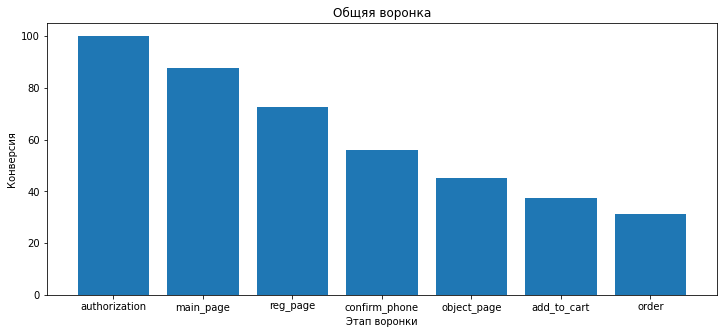

In [8]:
plt.figure(figsize=(12,5))

plt.bar(funnel_df['step'], funnel_df['conversion_from_first_%'])

plt.title('Общяя воронка')
plt.xlabel('Этап воронки')
plt.ylabel('Конверсия')

plt.show()

*На графике просматривается падение в вышеперечисленых этапах ворнки*

#### Визуализируем воронку step-by-step:

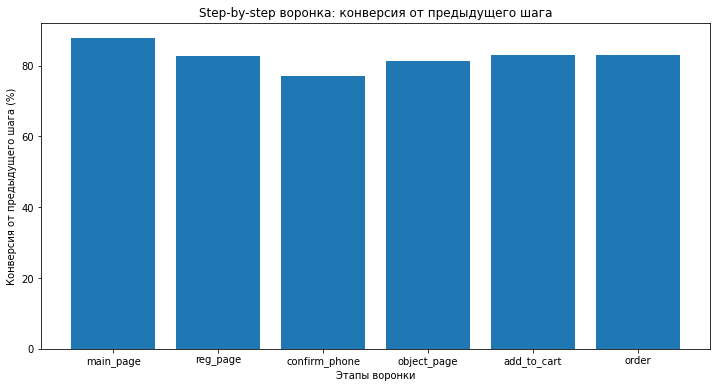

In [9]:
plt.figure(figsize=(12,6))

plt.bar(funnel_df['step'].iloc[1:], funnel_df['conversion_from_previous_%'].iloc[1:])

plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')

plt.show()

*Так же просматриваются проблемные места*

**Задача 2.2.** Сравните пользовательский путь в двух приложениях: в мобильной версии и десктопной. Для этого постройте и визуализируйте **две воронки step-by-step**: для новых пользователей **мобильной** и **десктопной** версий приложения.
    
Сравните результаты между собой и проанализируйте, есть ли различия в пользовательском пути для различных приложений. Результаты сравнения опишите в небольшом **промежуточном выводе**.

In [10]:
mobile_df = df[df['device_type'] == 'Mobile']
desktop_df = df[df['device_type'] == 'Desktop']

final_mobile_df = mobile_df[mobile_df['event'].isin(funnel_steps)]
mobile_df_agg = final_mobile_df.groupby('event')['visitor_uuid'].nunique().reindex(funnel_steps)
mobile_df_counts = (mobile_df_agg / mobile_df_agg.shift(1) * 100).round(1)

final_desktop_df = desktop_df[desktop_df['event'].isin(funnel_steps)]
desktop_df_agg = final_desktop_df.groupby('event')['visitor_uuid'].nunique().reindex(funnel_steps)
desktop_df_counts = (desktop_df_agg / desktop_df_agg.shift(1) * 100).round(1)

final_compare = pd.DataFrame({
    'step': funnel_steps[1:],
    'mobile': mobile_df_counts[1:].values,
    'desktop': desktop_df_counts[1:].values
})

display(final_compare.head())

,step,mobile,desktop
0,main_page,83.0,90.4
1,reg_page,88.7,79.5
2,confirm_phone,54.7,90.2
3,object_page,71.4,84.7
4,add_to_cart,86.7,81.8


*По данным видно что пользователи мобильной версии испытывают трудности при переходе к шагу confirm_phone и object_page, а десктопной при переходе к reg_page*

#### Визуализируем воронки

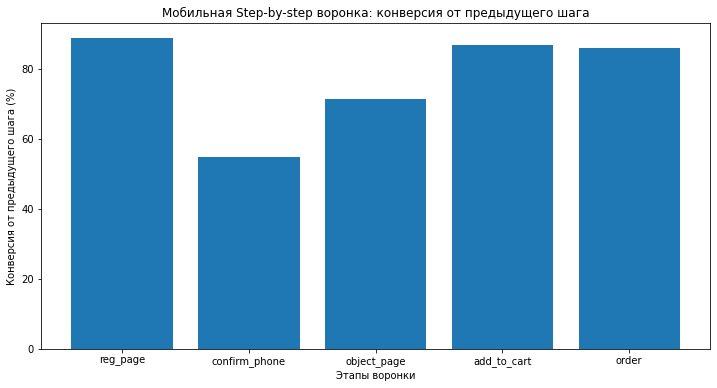

In [11]:
plt.figure(figsize=(12,6))

plt.bar(final_compare['step'][1:], final_compare['mobile'][1:])

plt.title('Мобильная Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')

plt.show()

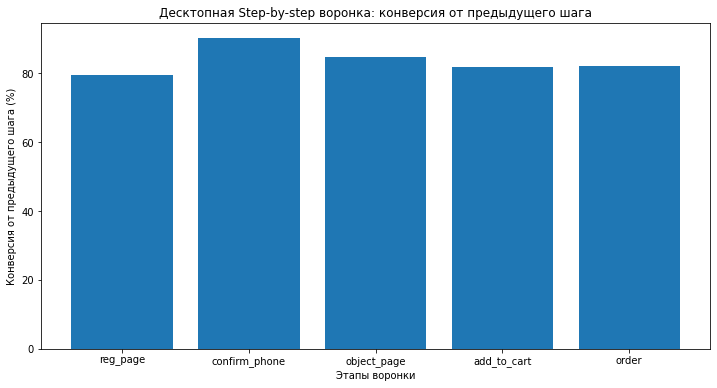

In [12]:
plt.figure(figsize=(12,6))

plt.bar(final_compare['step'][1:], final_compare['desktop'][1:])

plt.title('Десктопная Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')

plt.show()

**Промежуточные выводы**

**В целом как по общим воронкам, так и по воронкам Step-by-step (в том числе и с разбивкой на устройства) клиенты сильно теряются на нскольких шагах. Это переход к шагу main_page (для десктопной версии) и confirm_phone и object_page (для мобильной). Возможно, пользователям приходится долго ждать или вовсе не приходят смс на телефон, чтобы завершить регистрацию (такая проблема ярко выражена у пользователей мобильной версии). Также стоит обратить внимание, почему у нас теряются 14% пользователей при переходе к шагу main_page (данная тенденция наблюдается у пользователей десктопной версии, стоит проверить, мб у пользователей данного устройства есть проблемы с загрузкой сайта). В целом десктопная версия работает стабильнее, и процент потери пользователей, пользующихся данным типом устройств, меньше. Это отвечает на вопрос, почему доля заказов с десктопной версии приложения увеличилась по сравнению с мобильной.**

---

## 3. RFM сегментация

У сервиса доставки еды не такое высокое удержание пользователей: в первый день возвращается около 14% посетителей, а на седьмой день и того меньше — около 4–5%. Маркетологи хотят запустить несколько рекламных кампаний, направленных на удержание платящих пользователей и их возврат в сервис, если они давно не совершали заказы.

Для этого необходимо сегментировать пользователей на различные поведенческие сегменты с помощью RFM-сегментации по трём показателям: 
- **давность** (Recency), 
- **частота покупок** (Frequency), 
- **сумма трат** (Monetary).

В качестве даты анализа установите **03 июля 2021 года**.

**Задача 3.1.** Для каждого покупателя посчитайте:
- количество дней с последней покупки — давность (R);
- частоту покупок (F);
- стоимость всех покупок — сумму трат (M).
    
В качестве даты анализа установите **03 июля 2021 года**. После этого постройте три гистограммы и проанализируйте их.

In [13]:
orders_data = df[df['event'] == 'order'].copy()

orders_data['order_recency'] = pd.to_datetime('2021-07-03') - df['datetime']

df_rfm = orders_data.groupby('user_id').agg(
    recency=('order_recency', lambda x: x.min().days),
    frequency=('order_id', 'nunique'),
    monetary=('revenue', 'sum')
).reset_index()

df_rfm = df_rfm[df_rfm['monetary'] > 0]

display(df_rfm.head())

,user_id,recency,frequency,monetary
0,5506,32,2,3752.00
1,6291,57,1,1750.00
2,6820,41,1,1260.14
3,11062,57,1,3785.60
4,13254,54,1,553.00


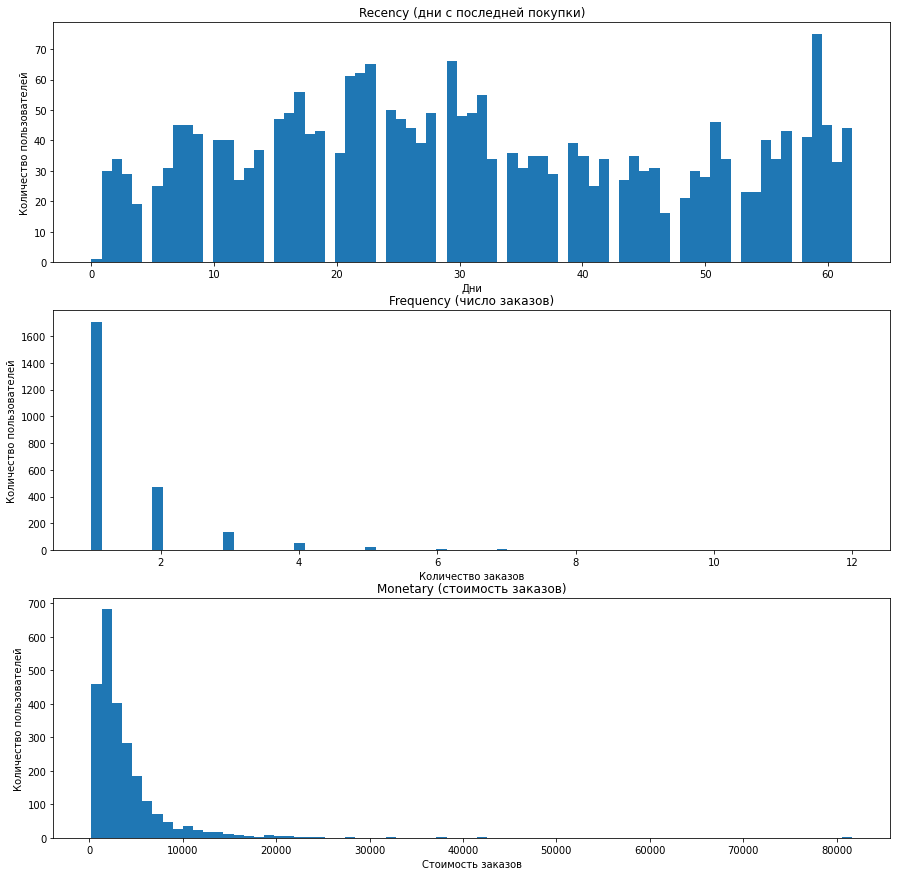

In [14]:
fig, axes = plt.subplots(3,1, figsize=(15,15))

axes[0].hist(df_rfm['recency'], bins=75)
axes[0].set_title('Recency (дни с последней покупки)')
axes[0].set_xlabel('Дни')
axes[0].set_ylabel('Количество пользователей')

axes[1].hist(df_rfm['frequency'], bins=75)
axes[1].set_title('Frequency (число заказов)')
axes[1].set_xlabel('Количество заказов')
axes[1].set_ylabel('Количество пользователей')

axes[2].hist(df_rfm['monetary'], bins=75)
axes[2].set_title('Monetary (стоимость заказов)')
axes[2].set_xlabel('Стоимость заказов')
axes[2].set_ylabel('Количество пользователей')

plt.show()

*Recency имеет равномерное распределние в то время как frequency и monetary смещены в лево.Большинство пользователей делают небольшие покупки в маленьких количествах но делают их постоянно*

**Задача 3.2.** Выделите **RFM-сегменты** и изучите распределение пользователей по ним.
    
Примените следующие подходы к выделению RFM сегментов:
- **Recency** — разделите на три равные группы.
- **Frequency** —  разделите на три группы: 
    - пользователи с 1 заказом (F-сегмент с небольшим количеством заказов);
    - пользователи с 2 заказами (F-сегмент со средним количеством заказов);
    - пользователи с 3 и более заказами (F-сегмент с большим количеством заказов).
- **Monetary** — разделите на три группы по 33-му и 66-му перцентилям.
    
После этого посчитайте количество покупателей в каждом сегменте, сделайте промежуточные выводы и напишите рекомендации.

In [15]:
df_rfm['r'] = pd.cut(df_rfm['recency'], bins = 3, labels = [3,2,1])

df_rfm['f'] = pd.cut(df_rfm['frequency'], [1,2,3, float('inf')], labels = [1,2,3], include_lowest=True)

df_rfm['m'] = pd.qcut(df_rfm['monetary'], q=3, labels = [1,2,3])

df_rfm[['r','f','m']] = df_rfm[['r','f','m']].astype(str)
df_rfm['rfm_group'] = df_rfm['r'] + df_rfm['f'] + df_rfm['m']

print(df_rfm['rfm_group'].head())

0    213
1    111
2    211
3    113
4    111
Name: rfm_group, dtype: object


*Выделили RFM-сегменты с помощью различных подходов для дальнейшего посчёта количества покупателей в каждом сегменте*

In [16]:
rfm_group = df_rfm.groupby('rfm_group')['user_id'].nunique().reset_index()

display(rfm_group.sort_values(by='user_id', ascending=False))

,rfm_group,user_id
8,212,296
7,211,289
0,111,263
1,112,261
15,311,255
9,213,237
16,312,234
17,313,187
2,113,160
12,223,56


**Промежуточный вывод**

**Проведя анализ с помошью RFM сегментации по графикам видно что Recency имеет равномерное распределние в то время как frequency и monetary смещены в лево.Большинство пользователей делают небольшие покупки в маленьких количествах но делают их часто. Далее выделил сегменты и посчитал количество покупателей в каждом из сегметнгов.**

**Топ-3 сегмента которые присутствуют в нашем продукте это сегменты '212','211' и '111' что в целом и показывает то что мы видим на графиках выше. Так же к наибольшая часть аудитории находится в сегментах '112','311','213','312','313','113'.Сегменты '332',
'132','221','332',322' практически не представлены.**

**Рекомендации**

**К самых активным и прибыльным клиентам(таких как 333,323 и т.п.) нужно отдельный подход,это наши 'Киты' и наша задача максимально стараться удержать эту аудиторию покупателей . Их стоит удерживать с помощью персонализированных предложений, программ лояльности и эксклюзивных акций.**

**Активные клиенты с потенциалом роста совершали покупки недавно и перспективны для вовлечения. Важно поддерживать их интерес к продукту и стимулировать к повторным покупкам. Сюда относятся сегменты 312, 311, 313, 212, 211.** 

**Неактивные клиенты давно не делали покупок, но среди них есть те, кто может принести прибыль. Чтобы вернуть их, стоит разработать специальные предложения. К неактивным клиентам сейчас относятся сегменты 111, 112, 113, 121, 122, 123.** 

---

## 4. K-Means кластеризация

Чтобы лучше понимать поведение ресторанов и предлагать им персонализированные условия сотрудничества, а также создавать персонализированные предложения для пользователей, маркетологи запросили кластеризацию ресторанов по следующим параметрам:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

С помощью метода K-Means разделите рестораны на кластеры, отражающие различные модели работы и целевые сегменты. Это позволяет выделить группы ресторанов с похожими характеристиками и разрабатывать для них эффективные маркетинговые стратегии.

**Задача 4.1.** Подготовьте данные для кластеризации и для каждого ресторана подсчитайте:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

In [17]:
orders_data = df[df['event'] == 'order']

restaurant_features = orders_data.groupby('rest_id').agg(
    total_orders=('order_id', 'nunique'),
    avg_order_value=('revenue', 'mean'),
    unique_dishes=('object_id', 'nunique')
).reset_index()

display(restaurant_features.sort_values(by='avg_order_value', ascending=False))

,rest_id,total_orders,avg_order_value,unique_dishes
9,55d6470712ee48e98509478ad6aa18ee,5,4754.400000,2
15,8d4f8073da2945c6bd8615fa95c74852,163,4561.140393,3
17,a29747e18d3f4ff487b355d34312aacb,94,3565.386553,9
5,43e40bacafe8409bb5592877a42d737e,43,3313.064186,6
6,4a693ca500b44ba499f92a724aec5f17,107,2989.588785,12
1,1d6bb74687104fa1953924c9684fe624,108,2959.256481,19
3,3247a3b5f9494812a3c1a73c5b61f004,33,2777.209697,4
8,55d4027ac83e438f9f893892f6903409,1001,2674.652364,75
7,4b9cde3378c447ed81c2c6d4854d4f7e,7,2544.000000,5
18,a59b5279a8674d7a8a16fbf5d92b5551,23,2399.843478,6


*Подготовили данные для кластеризации с сортировкой по среднему чеку что бы понимать в каких ресторанах средний чек выше.Деньги один из основных показателей для бизнеса,поэтому данная сортировка в будущем может помочь нам глубже проанализировать ресторы с высоким средним чеком и найти новые ценные инсайты для бизнеса*

**Задача 4.2.** Нормализуйте данные и найдите оптимальное количество кластеров, использовав метод `.inertia_`. Постройте график зависимости инерции от числа кластеров (метод «локтя») и предположите оптимальное количество кластеров.

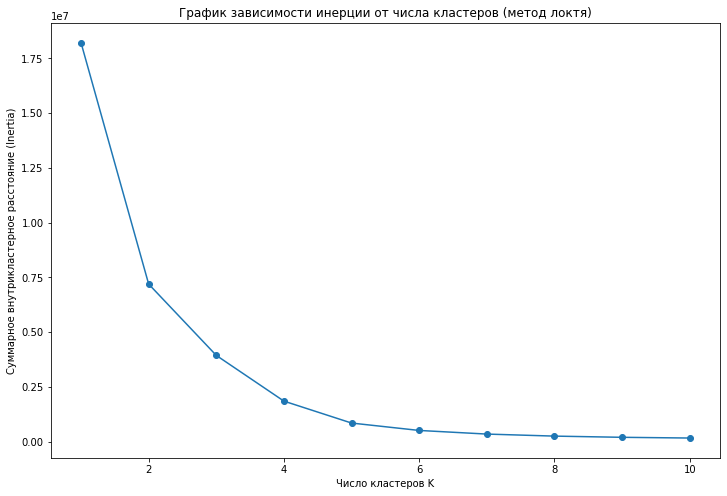

In [18]:
features_for_clustering = restaurant_features[['total_orders', 'avg_order_value', 'unique_dishes']]

i = []

min_k = 1
max_k = 10

plt.figure(figsize=(12, 8))

for k in range(min_k, max_k + 1):
   km = KMeans(n_clusters=k)  
   km.fit_transform(features_for_clustering)  
   i.append(km.inertia_)  

plt.plot(range(min_k, max_k + 1), i, marker='o')
plt.xlabel('Число кластеров K')  
plt.ylabel('Суммарное внутрикластерное расстояние (Inertia)')  
plt.title('График зависимости инерции от числа кластеров (метод локтя)')  
plt.show()

*Оптимальным количеством кластеров считаю 3*

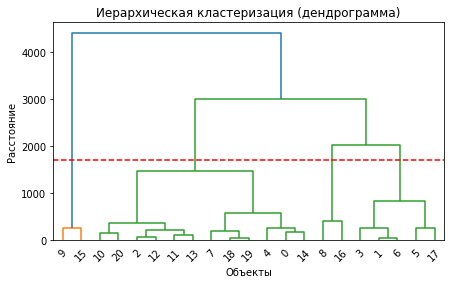

In [19]:
# Код ревьюера:
# Создадим таблицу связей:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(features_for_clustering, method = 'ward')

# Визуализируем таблицу связей:
plt.figure(figsize=(7, 4))  
dendrogram(linked, orientation='top')

plt.axhline(y=1700, color='r', linestyle='--')  
plt.title("Иерархическая кластеризация (дендрограмма)")
plt.xlabel("Объекты")
plt.ylabel("Расстояние")

plt.show()

**Задача 4.3.** Проведите кластеризацию, проанализируйте полученные результаты и рассчитайте средние значения по каждому кластеру.
    
После этого визуализируйте результаты, чтобы проследить зависимость признаков друг от друга. Постройте две визуализации, на которые нанесите все кластеры:
- средний чек в зависимости от количества заказов;
- количество блюд в зависимости от количества заказов.

После этого опишите каждый кластер в промежуточном выводе. 

In [20]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(features_for_clustering)

sorted_indices = np.argsort(kmeans.cluster_centers_[:, 1])
sorted_centroids = kmeans.cluster_centers_[sorted_indices]

centroids_df = pd.DataFrame(
   sorted_centroids,
   columns=['Общее количество заказов', 'Средняя стоимость заказа', 'Общее число заказанных уникальных блюд'],
   index=[f'Кластер {i + 1}' for i in range(kmeans.n_clusters)]
)

pd.options.display.float_format = '{:.3f}'.format

display(centroids_df.head())

,Общее количество заказов,Средняя стоимость заказа,Общее число заказанных уникальных блюд
Кластер 1,165.667,1964.233,15.500
Кластер 2,199.000,2974.737,18.571
Кластер 3,84.000,4657.770,2.500


*Получили среднии значения по кластерам*

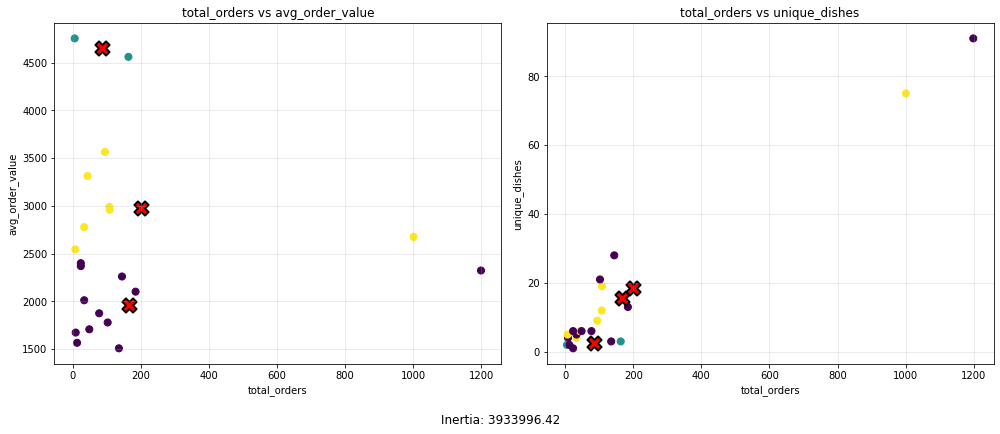

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axs = ["total_orders", "avg_order_value", "unique_dishes"]

for i, (x_idx, y_idx) in enumerate([[0, 1], [0, 2]]):
    x_label, y_label = axs[x_idx], axs[y_idx]
    
    axes[i].scatter(
        features_for_clustering[x_label],
        features_for_clustering[y_label],
        c=labels,
        cmap='viridis',
        s=50
    )
    
    axes[i].scatter(
        sorted_centroids[:, x_idx],
        sorted_centroids[:, y_idx],
        s=200,
        c='red',
        marker='X',
        edgecolors='black',
        linewidths=2
    )
    
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label)
    axes[i].set_title(f'{x_label} vs {y_label}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.05, 1, 1])
fig.text(0.5, 0.01, f'Inertia: {kmeans.inertia_:.2f}', ha='center', fontsize=12)

plt.show()

**Промежуточный вывод**

**В результате мы получили таблицу со средними значениями признаков:**


**Кластер 1: рестораны с наименьшей средней стоимостью заказа и общих заказов.**

**У таких ресторанов среднее количество заказанных уникальных блюд при наименьшей средней стоимостью заказа и наименьшем количестве общих заказов. Вероятно, клиенты таких ресторанов делают заказы недорогих (бюджетных) позиций в небольшом количестве. Возможно, на вынос или предпочитают быстрые перекусы. Было бы логично разработать сеты, которые удобно взять в дорогу (с собой), или ввести удобную посуду для выноса (как в «Макдоналдс» или похожих ресторанах быстрого питания).**

**Как улучшить взаимодействие с партнёрами-ресторанами?**
- Помощь в создании комбо-наборов и сетов для повышения среднего чека
- Оптимизация логистики для быстрой доставки (ключевой фактор для фастфуда)
- Маркетинг: продвижение как 'быстрых и недорогих' решений


**Кластер 2: рестораны с большим количеством как общих, так и уникальных заказов(золотая середина).**

**В таких ресторанах клиенты предпочитают разнообразные блюда и при этом регулярно посещают такие рестораны. Средняя стоимость заказа является средней по кластерам. Клиенты в таких ресторанах любят видеть новинки и делать заказы в больших количествах. Стоит предлагать им персонализированные предложения с новинками. Также насколько успешны новые позиции блюд можно проверять на данном кластере ресторанов, чтобы получить быстрый и качественный анализ успешности новых блюд.**

**Как улучшить взаимодействие с партнёрами-ресторанами?**
- Совместные маркетинговые акции (разделение затрат 50/50)
- Гибкие условия: обсуждаемая комиссия за объем


**Кластер 3: рестораны с большим средним чеком и малым количеством уникальных заказов.(Специализированые или премиум рестораны)**

**В этих ресторанах клиенты, скорее всего, готовы платить за качество и неизменность старых, уже полюбившихся им блюд. В таких ресторанах стоит с осторожностью относиться к любым изменениям в меню, особенно тем, что убирают старые позиции из него. Можно увеличить количество общих заказов, предлагая специализированные акции, в которых будут присутствовать всем полюбившиеся блюда.**

**Как улучшить взаимодействие с партнёрами-ресторанами?**
-  Специальная упаковка для премиум-сегмента
- Позиционирование как 'премиум' в приложении
- Минимальная комиссия за сохранение эксклюзивности

---

## 5. Итоговый вывод и рекомендации

Сформулируйте общий вывод. Зафиксируйте основные результаты и инсайты, которые, на ваш взгляд, помогут бизнесу улучшить продукт.

Выводы должны быть краткими и ёмкими, ведь их будут читать ваш заказчик, продуктовый менеджер и продуктовая команда.

**Проведя полный анализ ситуации, выводы и решения следующие:**

**1. У бизнеса есть проблемные места с потерей пользователей**

Клиенты сильно теряются на нескольких шагах. Это переход к шагу main_page (для десктопной версии) и confirm_phone и object_page (для мобильной). Возможно, пользователям приходится долго ждать или вовсе не приходят смс на телефон, чтобы завершить регистрацию (такая проблема ярко выражена у пользователей мобильной версии). Также стоит обратить внимание, почему у нас теряются 14% пользователей при переходе к шагу main_page (данная тенденция наблюдается у пользователей десктопной версии, стоит проверить, мб у пользователей данного устройства есть проблемы с загрузкой сайта). В целом десктопная версия работает стабильнее, и процент потери пользователей, пользующихся данным типом устройств, меньше. Это отвечает на вопрос, почему доля заказов с десктопной версии приложения увеличилась по сравнению с мобильной.

Необходимо срочно решить все возможные технические проблемы, выявить их с помощью тестирования продукта и, если технические проблемы обнаружатся, устранить их как можно скорее. Мы теряем потенциальных клиентов, а значит, теряем деньги для бизнеса.

**2. Клиенты делают мало заказов на небольшие суммы**

Анализ поведения клиентов показывает, что, несмотря на популярность продукта, пользователи делают небольшие и недорогие заказы. Необходимо провести маркетинговую компанию с целью повышения желания у клиентов покупать больше, а также постараться обратить их внимание на более дорогой и качественный сегмент, который есть в нашем продукте. Это мб специализированные акции, всплывающие или пуш уведомления, ввести отдельный премиум сегмент и создать условия и вид доступного премиум товара. Главная задача в первую очередь — постараться показать клиентам, что дорогой и качественный товар стоит их внимания.

**3. Улучшение взаимодействия с партнёрами-ресторанами**

Привлечения новых партнёров — это всегда хороший показатель роста продукта. Как нам их привлекать и улучшать взаимодействия? Так же, как и с клиентами.
Разработать разумные специальные предложения для каждых кластеров (типов поведения) ресторанов без вреда для бюджета бизнеса, и показать им, что мы являемся лучшим предложением на рынке.
Такими предложениями могут быть:
- Помощь в создании комбо-наборов и сетов для повышения среднего чека
- Совместные маркетинговые акции (разделение затрат 50/50)
- Позиционирование как «премиум» в приложении

Также сделать приложение удобным и доступным для партнёров, прозрачная комиссия и интуитивно понятный интерфейс.

**4. RFM-анализ показал три типа клиентов, каждому нужен свой подход**

В RFM-сегментации выделились три основные группы:

Новые/неактивные клиенты (45%): давно не заказывали, делали 1-2 покупки. Им нужны "пробуждающие" акции: промокоды "Вернись к нам", напоминания о лучших предложениях.

Активная база (35%): заказывают регулярно, средний чек. Это наш золотой фонд - им предлагаем программы лояльности, персональные рекомендации, доступ к новинкам.

Премиум-клиенты (20%): заказывают дорого и часто. Для них - VIP-условия, эксклюзивные предложения, специальные события.

Каждой группе нужны свои маркетинговые акции. Нельзя всем отправлять одинаковые рассылки - это пустая трата бюджета.

**5. Рестораны разделились на три кластера, каждому - свои условия сотрудничества**

Кластеризация K-Means показала:

Кластер 1 (бюджетные): 82 заказа по 1830 руб., 10 блюд. Им предлагаем сниженную комиссию за объем, помощь в создании комбо-наборов, обучение упаковке.

Кластер 2 (массовые): 264 заказа по 2792 руб., 23 блюда. Это основа бизнеса! Им - премиум-поддержку, совместные акции 50/50, аналитику спроса, тестирование новинок.

Кластер 3 (премиальные): 84 заказа по 4658 руб., всего 2-3 блюда. Им - минимальную комиссию 8-10% за эксклюзивность, позиционирование как премиум, организацию специальных событий.

**Исправления провалов на этапе воронки, увеличение прибыли и хорошие продуктивные взаимодействия с партнёрами всегда оказывают положительное влияние на рост как прибыли, так и всего продукта в целом.**